In [11]:
import pandas as pd
data = pd.read_csv('Untitled Folder/apple_stock_data.csv')
print(data.head())

                        Date   Adj Close       Close        High         Low  \
0  2023-11-02 00:00:00+00:00  176.665985  177.570007  177.779999  175.460007   
1  2023-11-03 00:00:00+00:00  175.750671  176.649994  176.820007  173.350006   
2  2023-11-06 00:00:00+00:00  178.317520  179.229996  179.429993  176.210007   
3  2023-11-07 00:00:00+00:00  180.894333  181.820007  182.440002  178.970001   
4  2023-11-08 00:00:00+00:00  181.958893  182.889999  183.449997  181.589996   

         Open    Volume  
0  175.520004  77334800  
1  174.240005  79763700  
2  176.380005  63841300  
3  179.179993  70530000  
4  182.350006  49340300  


In [13]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
data = data[['Close']]

In [15]:
data.head


<bound method NDFrame.head of                                 Close
Date                                 
2023-11-02 00:00:00+00:00  177.570007
2023-11-03 00:00:00+00:00  176.649994
2023-11-06 00:00:00+00:00  179.229996
2023-11-07 00:00:00+00:00  181.820007
2023-11-08 00:00:00+00:00  182.889999
...                               ...
2024-10-28 00:00:00+00:00  233.399994
2024-10-29 00:00:00+00:00  233.669998
2024-10-30 00:00:00+00:00  230.100006
2024-10-31 00:00:00+00:00  225.910004
2024-11-01 00:00:00+00:00  222.910004

[252 rows x 1 columns]>

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
data['Close'] = scaler.fit_transform(data[['Close']])

In [19]:
import numpy as np
def create_sequences(data, seq_length=60):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

seq_length = 60
X, y = create_sequences(data['Close'].values, seq_length)

In [23]:
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
lstm_model.add(LSTM(units=50))
lstm_model.add(Dense(1))

I:\Anaconda\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [27]:
lstm_model.compile(optimizer='adam', loss='mean_squared_error')
lstm_model.fit(X_train, y_train, epochs=20, batch_size=32)

Epoch 1/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 9s 77ms/step - loss: 0.1570
Epoch 2/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step - loss: 0.0267
Epoch 3/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.0235
Epoch 4/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0172
Epoch 5/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step - loss: 0.0167
Epoch 6/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step - loss: 0.0129
Epoch 7/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step - loss: 0.0111
Epoch 8/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step - loss: 0.0110
Epoch 9/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0085
Epoch 10/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - loss: 0.0087
Epoch 11/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - loss: 0.0086
Epoch 12/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 80ms/step - loss: 0.0079
Epoch 13/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 86ms/step - loss: 0.0071
Epoch 14/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step - loss: 0.0075
Epoch 15/20
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step - loss: 0.0072
Epoch 16/20
5/5 ━━━━━━━━━━━━━━━━━━

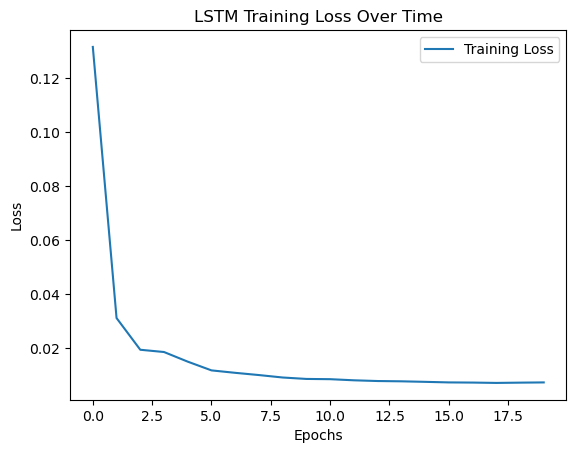

In [29]:
import matplotlib.pyplot as plt

plt.plot(lstm_model.history.history['loss'], label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('LSTM Training Loss Over Time')
plt.legend()
plt.show()


In [31]:
data['Lag_1'] = data['Close'].shift(1)
data['Lag_2'] = data['Close'].shift(2)
data['Lag_3'] = data['Close'].shift(3)
data = data.dropna()

In [33]:
X_lin = data[['Lag_1', 'Lag_2', 'Lag_3']]
y_lin = data['Close']
X_train_lin, X_test_lin = X_lin[:train_size], X_lin[train_size:]
y_train_lin, y_test_lin = y_lin[:train_size], y_lin[train_size:]

In [35]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()
lin_model.fit(X_train_lin, y_train_lin)

LinearRegression()

In [37]:
X_test_lstm = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))
lstm_predictions = lstm_model.predict(X_test_lstm)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

2/2 ━━━━━━━━━━━━━━━━━━━━ 2s 898ms/step


In [39]:
lin_predictions = lin_model.predict(X_test_lin)
lin_predictions = scaler.inverse_transform(lin_predictions.reshape(-1, 1))

In [45]:
print(lstm_predictions.shape)  # Shape of LSTM predictions
print(lin_predictions.shape)  # Shape of Linear Regression predictions



(39, 1)
(96, 1)


In [47]:
lin_predictions = lin_predictions[-lstm_predictions.shape[0]:]


In [49]:
lstm_predictions = lstm_predictions[-lin_predictions.shape[0]:]


In [51]:
hybrid_predictions = (0.7 * lstm_predictions) + (0.3 * lin_predictions)


In [53]:
lstm_future_predictions = []
last_sequence = X[-1].reshape(1, seq_length, 1)
for _ in range(10):
    lstm_pred = lstm_model.predict(last_sequence)[0, 0]
    lstm_future_predictions.append(lstm_pred)
    lstm_pred_reshaped = np.array([[lstm_pred]]).reshape(1, 1, 1)
    last_sequence = np.append(last_sequence[:, 1:, :], lstm_pred_reshaped, axis=1)
lstm_future_predictions = scaler.inverse_transform(np.array(lstm_future_predictions).reshape(-1, 1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step


In [57]:
import numpy as np
import pandas as pd

recent_data = data['Close'].values[-3:]  # Take the last 3 closing prices
lin_future_predictions = []

for _ in range(10):  # Predict for the next 10 days
    # Convert recent_data to DataFrame with correct feature names
    recent_data_df = pd.DataFrame([recent_data], columns=['Lag_1', 'Lag_2', 'Lag_3'])

    # Predict using the linear regression model
    lin_pred = lin_model.predict(recent_data_df)[0]

    # Store the prediction
    lin_future_predictions.append(lin_pred)

    # Update recent_data by shifting and adding the new prediction
    recent_data = np.append(recent_data[1:], lin_pred)

# Convert predictions back to original scale
lin_future_predictions = scaler.inverse_transform(np.array(lin_future_predictions).reshape(-1, 1))


In [59]:
hybrid_future_predictions = (0.7 * lstm_future_predictions) + (0.3 * lin_future_predictions)


In [61]:
future_dates = pd.date_range(start=data.index[-1] + pd.Timedelta(days=1), periods=10)
predictions_df = pd.DataFrame({
    'Date': future_dates,
    'LSTM Predictions': lstm_future_predictions.flatten(),
    'Linear Regression Predictions': lin_future_predictions.flatten(),
    'Hybrid Model Predictions': hybrid_future_predictions.flatten()
})
print(predictions_df)

                       Date  LSTM Predictions  Linear Regression Predictions  \
0 2024-11-02 00:00:00+00:00        229.712570                     230.355192   
1 2024-11-03 00:00:00+00:00        229.171982                     225.707291   
2 2024-11-04 00:00:00+00:00        228.624329                     222.703426   
3 2024-11-05 00:00:00+00:00        228.066605                     230.631535   
4 2024-11-06 00:00:00+00:00        227.499008                     225.486380   
5 2024-11-07 00:00:00+00:00        226.922028                     222.494588   
6 2024-11-08 00:00:00+00:00        226.336105                     230.930195   
7 2024-11-09 00:00:00+00:00        225.742126                     225.245599   
8 2024-11-10 00:00:00+00:00        225.141098                     222.284007   
9 2024-11-11 00:00:00+00:00        224.534073                     231.252375   

   Hybrid Model Predictions  
0                229.905355  
1                228.132567  
2                226.848061  